In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import itertools

In [2]:
df = pd.read_excel("Sensor-Data.xlsx")

In [3]:
df.head()

,Chemical,Monitor,Date Time,Reading
0,Methylosmolene,3,2016-04-01,2.683820
1,Methylosmolene,7,2016-04-01,2.630640
2,Chlorodinine,3,2016-04-01,1.259170
3,Chlorodinine,7,2016-04-01,0.943983
4,AGOC-3A,3,2016-04-01,0.722303


In [4]:
df.columns

Index(['Chemical', 'Monitor', 'Date Time ', 'Reading'], dtype='object')

In [5]:
df["Chemical"].unique()

array(['Methylosmolene', 'Chlorodinine', 'AGOC-3A', 'Appluimonia'], dtype=object)

In [6]:
g = df.groupby(["Monitor","Date Time "])

In [7]:
bad_observations = []
all_observations = []
for name,group in g:
    y = group.set_index("Chemical")
    z = y.T
    all_chems = True
    for chem in ['AGOC-3A','Appluimonia','Chlorodinine','Methylosmolene']:
        if chem not in z.columns:
            bad_observations.append(z)
            all_chems = False
    if all_chems:
        all_observations.append(z[['AGOC-3A','Appluimonia','Chlorodinine','Methylosmolene']].iloc[2,:].values)

In [8]:
print(len(bad_observations))

223


In [9]:
print(len(all_observations))

19595


In [10]:
all_obs = np.array(all_observations)

In [11]:
all_obs.shape

(19595, 4)

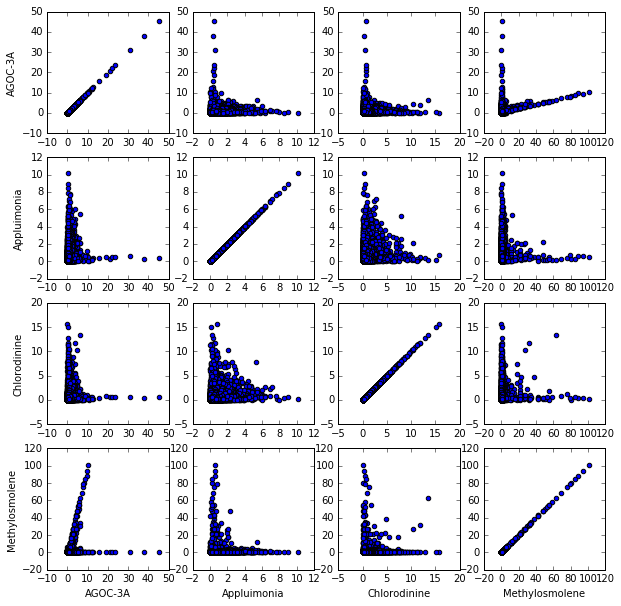

In [15]:
nvar = 4
chems = ['AGOC-3A','Appluimonia','Chlorodinine','Methylosmolene']
plt.figure(figsize=(10,10))
for i, j in itertools.product(range(4),range(4)):
    # print(i,j)
    ax = plt.subplot(nvar,nvar,i+j*nvar+1)
    ax.scatter(all_obs[:,i],all_obs[:,j])
    if i==0:
        ax.set_ylabel(chems[j])
    if j==3:
        ax.set_xlabel(chems[i])

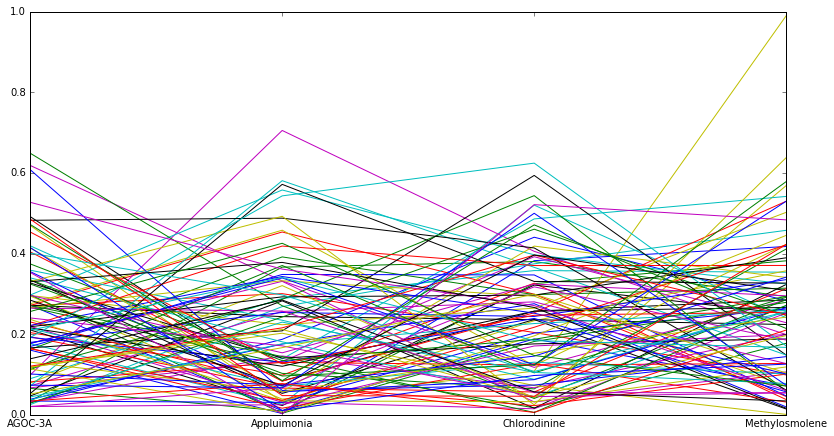

In [18]:
chems = ['AGOC-3A','Appluimonia','Chlorodinine','Methylosmolene']
fig = plt.figure(figsize=(15,8))
ax = fig.add_axes([0.2,.2,.7,.7])
for i in range(100):
    ax.plot(range(len(chems)),all_obs[i,:])
    ax.set_xticks(range(len(chems)))
    ax.set_xticklabels(chems)

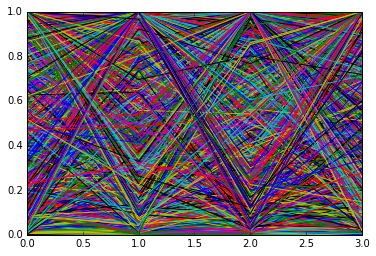

In [20]:
p = plt.plot(range(len(chems)),(all_obs.T/(all_obs.T.max(axis=0)))[:1000])

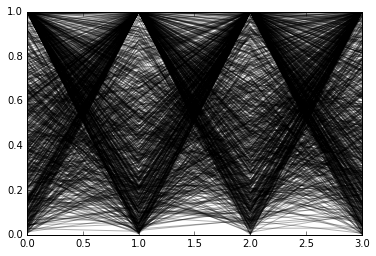

In [24]:
p = plt.plot(range(len(chems)),(all_obs.T/(all_obs.T.max(axis=0)))[:,:1000],color="k",alpha=.3)